# Análise de Risco no Transporte Público

Este projeto é orientado pela instituição Data Science Academy dentro de um dos cursos da Formação Cientista de Dados 3.0. O principal objetivo desse projeto é praticar as habilidades de análise exploratória e conhecimento de negócios, utilizando gráficos e storytelling. Neste projeto serão respondidas 10 perguntas sobre os dados, são elas:

1. Qual a quantidade de incidentes por gênero?
2. Qual faixa etária esteve mais envolvida nos incidentes?
3. Qual o percentual de incidentes por tipo de evento (Incident Event Type)?
4. Como foi a evolução de incidentes por mês ao longo do tempo?
5. Quando o incidente foi “Collision Incident” em qual mês houve o maior número de incidentes envolvendo pessoas do sexo feminino?
6. Qual foi a média de incidentes por mês envolvendo crianças (Child)?
7. Considerando a descrição de incidente como “Injuries treated on scene” (coluna Injury Result Description), qual o total de incidentes de pessoas do sexo masculino e sexo feminino?
8. No ano de 2017 em qual mês houve mais incidentes com idosos (Elderly)?
9. Considerando o Operador qual a distribuição de incidentes ao longo do tempo?
10. Qual o tipo de incidente mais comum com ciclistas?

Os dados são relatórios trimestrais sobre acidentes registrados na rede de ônibus de Londres.

Link: https://data.world/makeovermonday/2018w51

## Importando Pacotes

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import lines
from matplotlib import patches
from matplotlib.patheffects import withStroke
import matplotlib.patches as patches
import seaborn as sns
import plotly.express as px
import warnings

# Ignorando mensagem de warning
warnings.filterwarnings('ignore')

# Formatação dos gráficos
plt.figure(figsize = (10, 6))
# matplotlib.use('nbAgg')
plt.rcParams.update({'figure.max_open_warning': 0})
sns.set_style('whitegrid')

<Figure size 1000x600 with 0 Axes>

Carregando dataset.

In [2]:
df = pd.read_excel('dados/TFL_Bus_Safety.xlsx')
df.head()

Year Date Of Incident Route        Operator  Group Name  \
0  2015       2015-01-01     1  London General    Go-Ahead   
1  2015       2015-01-01     4       Metroline   Metroline   
2  2015       2015-01-01     5     East London  Stagecoach   
3  2015       2015-01-01     5     East London  Stagecoach   
4  2015       2015-01-01     6       Metroline   Metroline   

             Bus Garage              Borough  \
0  Garage Not Available            Southwark   
1  Garage Not Available            Islington   
2  Garage Not Available             Havering   
3  Garage Not Available  None London Borough   
4  Garage Not Available          Westminster   

                           Injury Result Description Incident Event Type  \
0                          Injuries treated on scene    Onboard Injuries   
1                          Injuries treated on scene    Onboard Injuries   
2  Taken to Hospital – Reported Serious Injury or...    Onboard Injuries   
3  Taken to Hospital – Reported Serious Injury or...    Onboard Injuries   
4        Reported Minor Injury - Treated at Hospital    Onboard Injuries   

  Victim Category Victims Sex Victims Age  
0       Passenger        Male       Child  
1       Passenger        Male     Unknown  
2       Passenger        Male     Elderly  
3       Passenger        Male     Elderly  
4      Pedestrian      Female     Elderly

Verificando se os dtypes das colunas estão corretos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23158 entries, 0 to 23157
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Year                       23158 non-null  int64         
 1   Date Of Incident           23158 non-null  datetime64[ns]
 2   Route                      23158 non-null  object        
 3   Operator                   23158 non-null  object        
 4   Group Name                 23158 non-null  object        
 5   Bus Garage                 23158 non-null  object        
 6   Borough                    23158 non-null  object        
 7   Injury Result Description  23158 non-null  object        
 8   Incident Event Type        23158 non-null  object        
 9   Victim Category            23158 non-null  object        
 10  Victims Sex                23158 non-null  object        
 11  Victims Age                23158 non-null  object        
dtypes: d

Verificando se há valores NA no dataset.

In [4]:
df.isna().sum()

Year                         0
Date Of Incident             0
Route                        0
Operator                     0
Group Name                   0
Bus Garage                   0
Borough                      0
Injury Result Description    0
Incident Event Type          0
Victim Category              0
Victims Sex                  0
Victims Age                  0
dtype: int64

## Análise Exploratória

**Qual a quantidade de incidentes por gênero?**

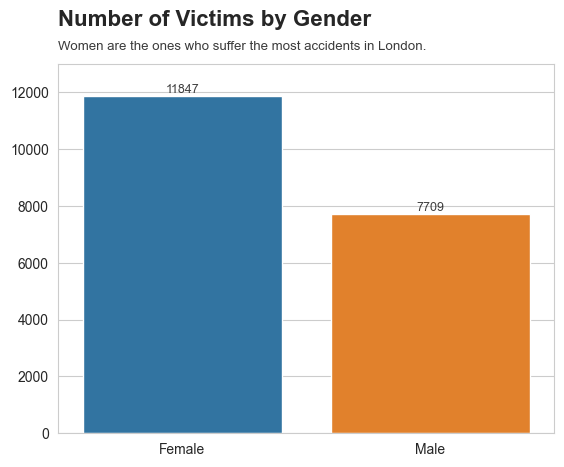

In [5]:
p1 = df[df['Victims Sex'] != 'Unknown']

ax = sns.countplot(x= p1['Victims Sex'].sort_values())
plt.title('Number of Victims by Gender', fontsize= 16, y= 1.08, loc= 'left', fontweight= 'bold')

# Removendo a legenda dos eixos x e y
ax.set(xlabel= None, ylabel= None)

# Ajustando o eixo y
ax.set_ylim(0, 13000)

# Adicione números nas barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha= 'center', va= 'center', fontsize= 9, color= 'black', xytext= (0, 5),
                        alpha= 0.75, textcoords= 'offset points')
    
ax.text(x= -0.5, 
        y= 13500,
        s= 'Women are the ones who suffer the most accidents in London.',
        fontsize= 9.5, 
        alpha= .90);

plt.show()

**Qual faixa etária esteve mais envolvida nos incidentes?**

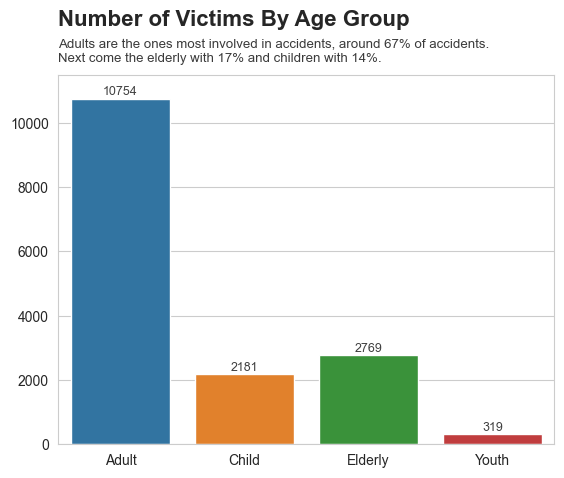

In [6]:
p2 = df[df['Victims Age'] != 'Unknown']

ax = sns.countplot(x= p2['Victims Age'].sort_values())
plt.title('Number of Victims By Age Group', fontsize= 16, y= 1.11, loc= 'left', fontweight= 'bold')

# Removendo a legenda dos eixos x e y
ax.set(xlabel= None, ylabel= None)

# Ajustando o eixo y
ax.set_ylim(0, 11500)

# Adicione números nas barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha= 'center', va= 'center', fontsize= 9, color= 'black', xytext= (0, 5),
                        alpha= 0.75, textcoords= 'offset points')
    
ax.text(x= -0.5, 
        y= 11900,
        s= 'Adults are the ones most involved in accidents, around 67% of accidents. \nNext come the elderly with 17% and children with 14%.',
        fontsize= 9.5, 
        alpha= .90);

plt.show()

**Qual o percentual de incidentes por tipo de evento (Incident Event Type)?**

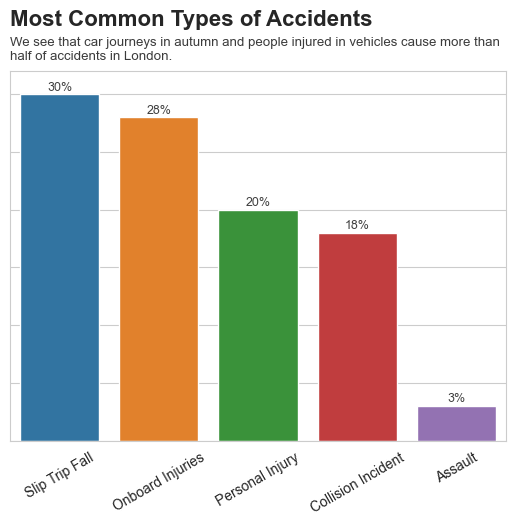

In [7]:
p3 = df['Incident Event Type'].value_counts(normalize= True).round(2) * 100
p3 = pd.DataFrame(p3).reset_index()
p3 = p3[p3['proportion'] > 0.1]

ax = sns.barplot(data= p3, x= 'Incident Event Type', y= 'proportion')
plt.title('Most Common Types of Accidents', fontsize= 16, y= 1.1, loc= 'left', fontweight= 'bold')

# Removendo a legenda dos eixos X e Y
ax.set(xlabel= None, ylabel= None)

# Ajustando o eixo Y
ax.set_ylim(0, 32)

# Rotacionando os valores do eixo X
plt.xticks(rotation= 30)

# Removendo os valores do eixo Y
plt.gca().yaxis.set_major_formatter(plt.NullFormatter())

# Adicione números nas barras
for p in ax.patches:
    value = int(p.get_height())  # Calcula o valor com base na proporção
    ax.annotate(f'{value}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha= 'center', va= 'center', fontsize= 9, color= 'black', xytext= (0, 5), alpha= 0.75, textcoords= 'offset points')
    
# Adicionando subtítulo
ax.text(x= -0.5, 
        y= 33,
        s= 'We see that car journeys in autumn and people injured in vehicles cause more than \nhalf of accidents in London.',
        fontsize= 9.5, 
        alpha= .90);

plt.show()

**Como foi a evolução de incidentes por mês ao longo do tempo?**

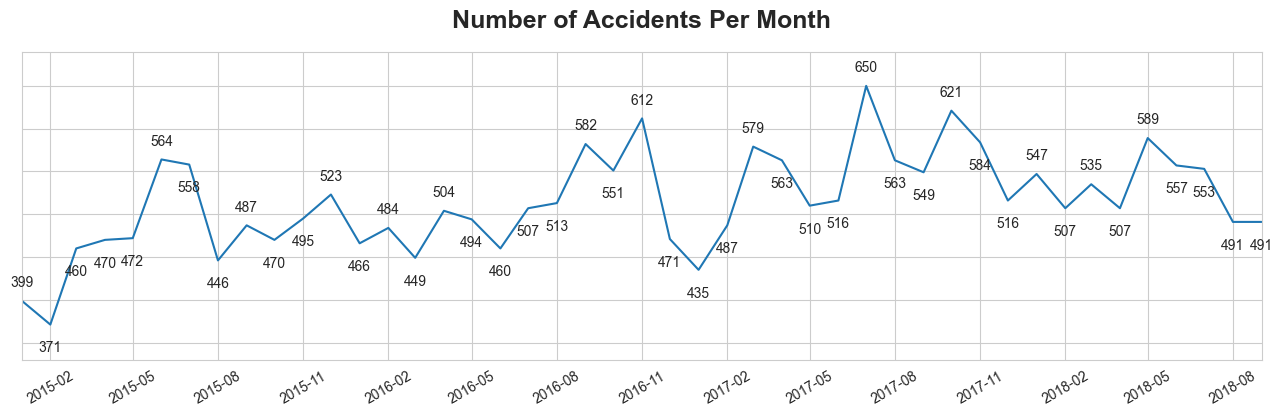

In [8]:
fig, ax = plt.subplots(figsize= (16, 4))

p4 = df.groupby('Date Of Incident').agg({'Victims Age': 'count'}).reset_index()
p4 = p4.rename(columns = {'Victims Age': 'Total Number of Victims'})

# Plot
ax.plot(p4['Date Of Incident'], p4['Total Number of Victims']);
plt.title('Number of Accidents Per Month', fontsize= 18, y= 1.05, fontweight= 'bold')

# Mostrando os valores do eixo X de 3 em 3 meses
ax.xaxis.set_major_locator(mdates.MonthLocator(interval= 3))

# Ajustando o eixo Y
ax.set_ylim(330, 690)

# Removendo os valores do eixo Y
plt.gca().yaxis.set_major_formatter(plt.NullFormatter())

# Ajustando os limites do início e fim do gráfico
ax.set_xlim(p4['Date Of Incident'].min(), p4['Date Of Incident'].max())

# Rotacionando os valores do eixo X
plt.xticks(rotation= 30)

# Adicionando os valores no topo da linha
for i, (date, value) in enumerate(zip(p4['Date Of Incident'], p4['Total Number of Victims'])):
    if i == 0:
        offset = 10
    elif i == len(p4) - 1:
        offset = -20
    else:
        prev_value = p4['Total Number of Victims'].iloc[i - 1]
        next_value = p4['Total Number of Victims'].iloc[i + 1]
        if value >= prev_value and value >= next_value:
            offset = 10
        else:
            offset = -20
    
    ax.annotate(value, (date, value), textcoords = 'offset points', xytext= (0, offset), ha= 'center')
    
plt.show()

**Quando o incidente foi “Collision Incident” em qual mês houve o maior número de incidentes envolvendo pessoas do sexo feminino?**

In [9]:
# Filtrando os dados pelas condições desejadas
p5 = df[(df['Incident Event Type'] == 'Collision Incident') & (df['Victims Sex'] == 'Female')]
p5['Mês'] = p5['Date Of Incident'].dt.month
p5 = p5.groupby('Mês').agg({'Victims Sex': 'count'}).reset_index()
p5

meses = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

p5['Mês'] = p5['Mês'].map(meses)

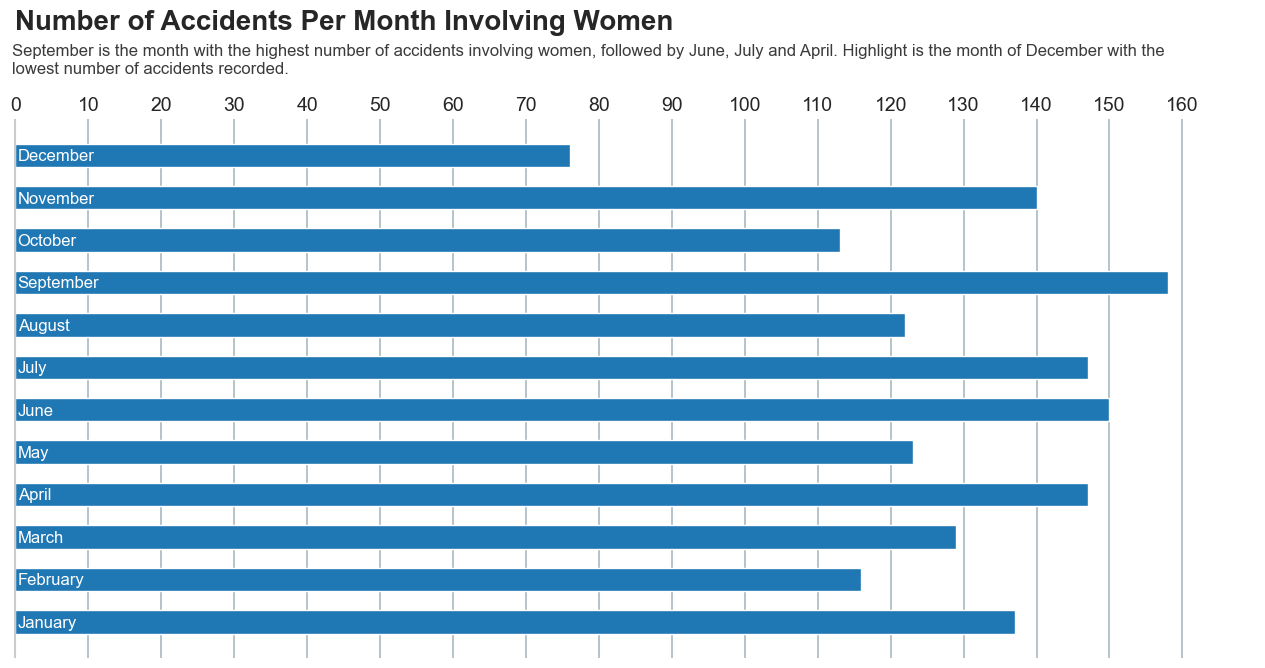

In [10]:
# Configurando tamanho do gráfico
fig, ax = plt.subplots(figsize=(16, 7))

# Plot
ax.barh(p5['Mês'], p5['Victims Sex'], height= 0.55, align= 'edge')
plt.title('Number of Accidents Per Month Involving Women', fontsize= 20, y= 1.15, loc= 'left', fontweight= 'bold')

# Configurando o tamamho e layout dos eixos X e Y
ax.xaxis.set_ticks([i * 10 for i in range(0, 17)])
ax.xaxis.set_ticklabels([i * 10 for i in range(0, 17)], size= 14, fontweight= 100)
ax.xaxis.set_tick_params(labelbottom= False, labeltop= True, length= 0)
ax.set_xlim((0, 170))

# Manipulando a sgrades
ax.set_axisbelow(True)
ax.grid(axis= 'x', color= '#A8BAC4', lw= 1.2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_lw(1.5)
ax.spines['left'].set_capstyle('butt')

# Removendo a legenda do eixo Y
ax.yaxis.set_visible(False)

# Adicionando os valores em cima da barra
PAD = 0.3
for name, count, y_pos in zip(p5['Mês'].values, p5['Victims Sex'].values, range(0, len(p5['Mês']))):
    x = 0
    color = 'white'
    path_effects = None
    if count < 8:
        x = count
        color = BLUE    
        path_effects = [withStroke(linewidth= 6, foreground= 'white')]
    
    ax.text(
        x + PAD, y_pos + 0.5 / 2, name, 
        color = color, fontsize= 12, va= 'center',
        path_effects= path_effects
    ) 

# Adicionando subtítulo
ax.text(x= -0.5, 
        y= 13.2,
        s= 'September is the month with the highest number of accidents involving women, followed by June, July and April. Highlight is the month of December with the \nlowest number of accidents recorded.',
        fontsize= 12, 
        alpha= .90)    

plt.show()

**Qual foi a média de incidentes por mês envolvendo crianças (Child)?**

In [11]:
p6 = df[df['Victims Age'] == 'Child']
p6['Ano'] = p6['Date Of Incident'].dt.year
p6['Mês'] = p6['Date Of Incident'].dt.month
p6 = p6.groupby(['Ano', 'Mês']).agg({'Victims Age': 'count'}).reset_index()
p6 = p6.groupby('Mês')['Victims Age'].mean().round(2).reset_index()

p6['Mês'] = p6['Mês'].map(meses)

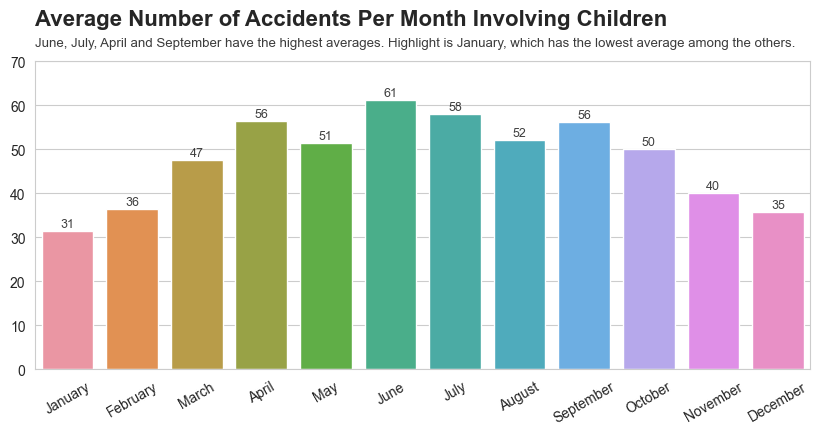

In [12]:
# Configurando tamanho do gráfico
plt.figure(figsize= (10, 4))

# Plot
ax = sns.barplot(data= p6, x= 'Mês', y= 'Victims Age')
plt.title('Average Number of Accidents Per Month Involving Children', fontsize= 16, y= 1.09, loc= 'left', fontweight= 'bold')

# Removendo a legenda dos eixos X e Y
ax.set(xlabel= None, ylabel= None)

# Ajustando o eixo Y
ax.set_ylim(0, 70)

# Rotacionando os valores do eixo X
plt.xticks(rotation= 30)

# Adicione números nas barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha= 'center', va= 'center', fontsize= 9, color= 'black', xytext= (0, 5),
                        alpha= 0.75, textcoords= 'offset points')
    
# Adicionando subtítulo
ax.text(x= -0.5, 
        y= 73.5,
        s= 'June, July, April and September have the highest averages. Highlight is January, which has the lowest average among the others.',
        fontsize= 9.5, 
        alpha= .90)

plt.show()

**Considerando a descrição de incidente como “Injuries treated on scene” (coluna Injury Result Description), qual o total de incidentes de pessoas do sexo masculino e sexo feminino?**

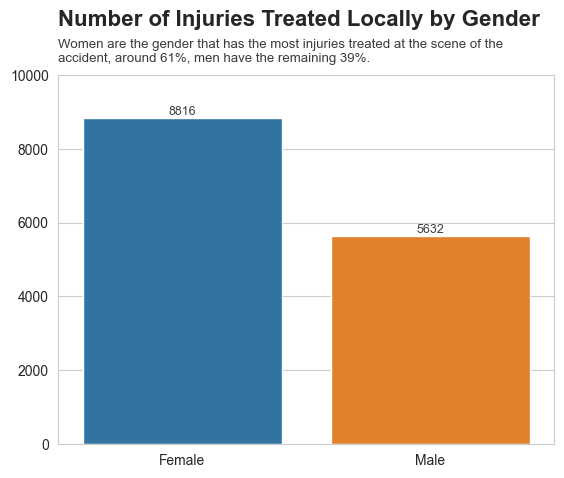

In [13]:
p7 = df[df['Injury Result Description'] == 'Injuries treated on scene']
p7 = p7[p7['Victims Sex'] != 'Unknown']


ax = sns.countplot(x= p7['Victims Sex'].sort_values())
plt.title('Number of Injuries Treated Locally by Gender', fontsize= 16, y= 1.11, loc= 'left', fontweight= 'bold')

# Removendo a legenda dos eixos x e y
ax.set(xlabel= None, ylabel= None)

# Ajustando o eixo y
ax.set_ylim(0, 10000)

# Adicione números nas barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha= 'center', va= 'center', fontsize= 9, color= 'black', xytext= (0, 5),
                        alpha= 0.75, textcoords= 'offset points')
    
ax.text(x= -0.5, 
        y= 10360,
        s= 'Women are the gender that has the most injuries treated at the scene of the \naccident, around 61%, men have the remaining 39%.',
        fontsize= 9.5, 
        alpha= .90);

plt.show()

**No ano de 2017 em qual mês houve mais incidentes com idosos (Elderly)?**

In [14]:
p8 = df[(df['Year'] == 2017) & (df['Victims Age'] == 'Elderly')]
p8['Mês'] = p8['Date Of Incident'].dt.month
p8['Mês'] = p8['Mês'].map(meses)

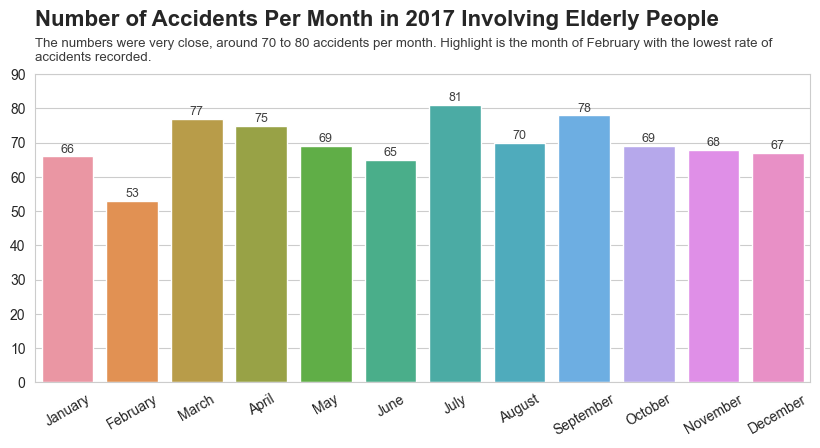

In [15]:
# Configurando tamanho do gráfico
plt.figure(figsize= (10, 4))

# Plot
ax = sns.countplot(x= p8['Mês'])
plt.title('Number of Accidents Per Month in 2017 Involving Elderly People', fontsize= 16, y= 1.13, loc= 'left', fontweight= 'bold')

# Removendo a legenda dos eixos x e y
ax.set(xlabel= None, ylabel= None)

# Ajustando o eixo y
ax.set_ylim(0, 90)

# Rotacionando os valores do eixo X
plt.xticks(rotation= 30)

# Adicione números nas barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha= 'center', va= 'center', fontsize= 9, color= 'black', xytext= (0, 5),
                        alpha= 0.75, textcoords= 'offset points')
    
ax.text(x= -0.5, 
        y= 94,
        s= 'The numbers were very close, around 70 to 80 accidents per month. Highlight is the month of February with the lowest rate of \naccidents recorded.',
        fontsize= 9.5, 
        alpha= .90);

plt.show()

**Considerando o Operador qual a distribuição de incidentes ao longo do tempo?**

In [16]:
p9_v1 = df.groupby('Operator').agg({'Victims Age': 'count'}).reset_index().sort_values(by= ['Victims Age'], ascending= False)
operator_top7 = p9_v1.iloc[0:8, 0]

p9_v1 = df[df['Operator'].isin(operator_top7)]
p9_v1 = p9_v1.groupby(['Date Of Incident', 'Operator']).agg({'Victims Age': 'count'}).reset_index()

In [17]:
# Shades of gray
GREY10 = "#1a1a1a"
GREY30 = "#4d4d4d"
GREY40 = "#666666"
GREY50 = "#7f7f7f"
GREY60 = "#999999"
GREY75 = "#bfbfbf"
GREY91 = "#e8e8e8"
GREY98 = "#fafafa"

# Colors used to shade countries
COLOR_SCALE = [
    "#7F3C8D",
    "#11A579",
    "#3969AC",
    "#F2B701", 
    "#E73F74", 
    "#80BA5A", 
    "#E68310", 
    GREY50     
]

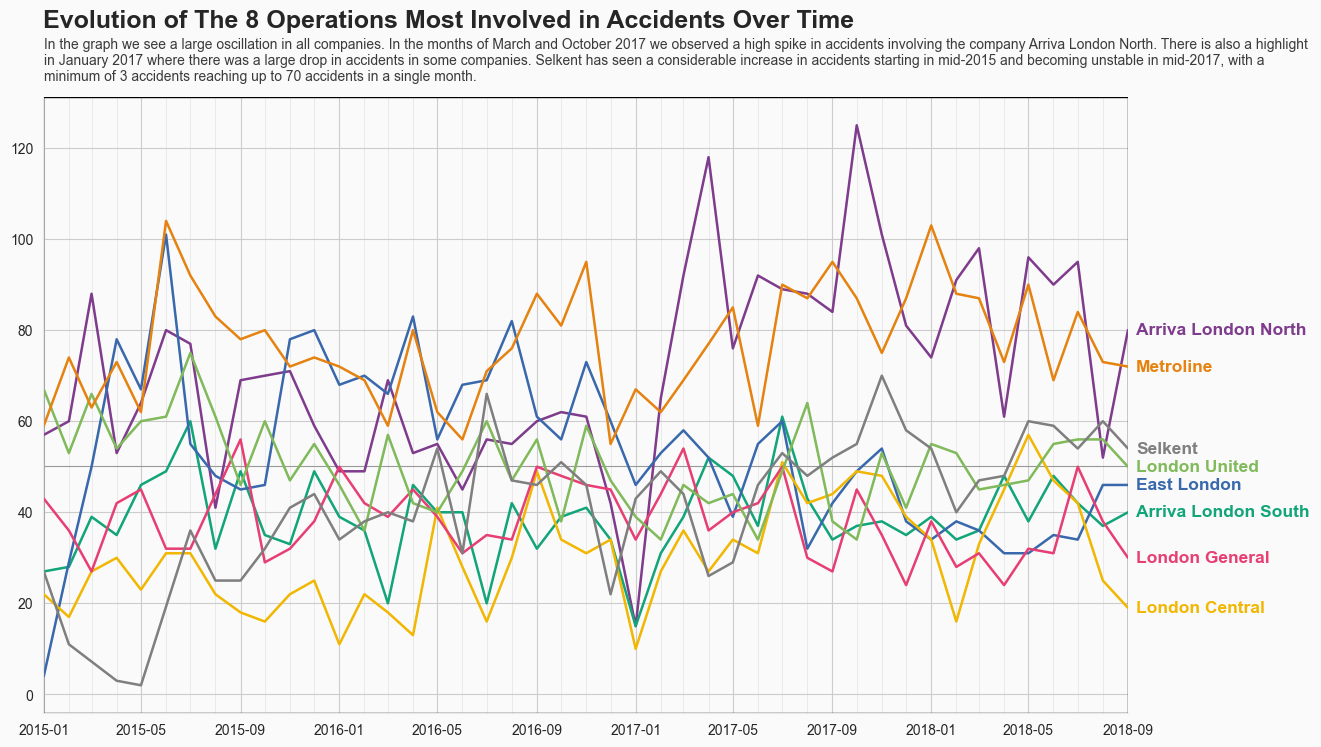

In [18]:
# Configurando tamanho do gráfico
fig, ax = plt.subplots(figsize= (14, 8))

# Configurando os valores do eixo X
ax.set_xlim(p9_v1['Date Of Incident'].min() - pd.DateOffset(days= 1), p9_v1['Date Of Incident'].max())

# Configurando cor do background do plot
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

# Configurando as linhas do eixo X
for h in p9_v1['Date Of Incident'].unique():
    ax.axvline(h, color= GREY91, lw= 0.6, zorder= 0)


# Fazendo uma linha no eixo Y com a média da coluna Victims Age
ax.hlines(y= p9_v1['Victims Age'].mean(), xmin= p9_v1['Date Of Incident'].min(), xmax= p9_v1['Date Of Incident'].max(), color= GREY60, lw= 0.8)

PAD = 0.2

for group in p9_v1['Operator'].unique():
    data = p9_v1[p9_v1['Operator'] == group]
    ax.plot('Date Of Incident', 'Victims Age', c= GREY75, lw= 1.2, alpha= 0.5, data= data)

for idx, group in enumerate(p9_v1['Operator'].unique()):
    data = p9_v1[p9_v1['Operator'] == group]
    color = COLOR_SCALE[idx]
    ax.plot('Date Of Incident', 'Victims Age', color= color, lw= 1.8, data= data)
    
for idx, group in enumerate(p9_v1['Operator'].unique()):
    data = p9_v1[p9_v1['Operator'] == group]
    color = COLOR_SCALE[idx]
    
    # Coordenadas x e y para o texto da legenda
    last_row = data.tail(1)
    x_label = last_row['Date Of Incident'].values[0] + pd.DateOffset(days= 10)
    y_label = last_row['Victims Age'].values[0]
    
    # Adicione o nome da operadora como texto da legenda
    ax.text(x_label, y_label, group, color= color, fontsize= 12.5, weight= 'bold', va= 'center', ha= 'left')
    
    ax.hlines(y_label, x_label, p9_v1['Date Of Incident'].max(), color= color, linestyle= 'dashed', lw= .8, alpha = .6)
    
ax.spines["left"].set_color(GREY91)
ax.spines["bottom"].set_color(GREY91)
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")

# Adicionar retângulo preto ao redor do gráfico
rect = patches.Rectangle((ax.get_xlim()[0], ax.get_ylim()[0]), ax.get_xlim()[1] - ax.get_xlim()[0], ax.get_ylim()[1] - ax.get_ylim()[0], linewidth=1, edgecolor='black', facecolor='none')
ax.add_patch(rect)

# Título
plt.title('Evolution of The 8 Operations Most Involved in Accidents Over Time', fontsize= 18, y= 1.1, loc= 'left', fontweight= 'bold')

# Subtítulo
ax.text(x= 16436, 
        y= 134.8,
        s= 'In the graph we see a large oscillation in all companies. In the months of March and October 2017 we observed a high spike in accidents involving the company Arriva London North. There is also a highlight \nin January 2017 where there was a large drop in accidents in some companies. Selkent has seen a considerable increase in accidents starting in mid-2015 and becoming unstable in mid-2017, with a \nminimum of 3 accidents reaching up to 70 accidents in a single month.',
        fontsize= 10, 
        alpha= .90);

plt.show()

In [19]:
p9_v2 = df.groupby(['Operator', 'Date Of Incident']).agg({'Victims Age': 'count'}).reset_index()
p9_v2 = p9_v2.rename(columns = {'Victims Age': 'Total Number of Victims'})

In [20]:
# Plot
ax = px.line(p9_v2, x= 'Date Of Incident', y= 'Total Number of Victims', facet_col= 'Operator', facet_col_wrap= 5)

# Adicione um título geral
ax.update_layout(title= 'Evolution of Accidents by Operator Over Time', title_x= 0.7)

# Ajustando tamanho da figura
ax.update_layout(width= 1000, height= 800, bargap= 0.2)

# Removendo as legendas dos eixos X e Y
ax.update_xaxes(title_text= None)
ax.update_yaxes(title_text= None)

# Ajustando os títulos de cada gráfico
ax.for_each_annotation(lambda a: a.update(text= a.text.split("=")[-1]))

ax.show()

In [21]:
def plot_operator(operator, data, annotate, ax):
    
    for operator_inner in operator_name:
        d = p9_v2[p9_v2['Operator'] == operator_inner] 
        x = d['Date Of Incident'].values
        y = d['Total Number of Victims'].values

        if operator_inner == operator:
            ax.plot(x, y, color= '#0b53c1', lw= 2.4, zorder= 10)
            ax.scatter(x, y, fc= 'w', ec= '#0b53c1', s= 60, lw= 2.4, zorder= 12)
            if annotate:
                continue
        else:
            ax.plot(x, y, color= '#BFBFBF', lw= 1.5)

    ax.tick_params(bottom= False)
    ax.set_frame_on(False)
    ax.set_title(operator, fontsize= 14, fontweight= 500)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval= 2))
    plt.xticks(rotation = 30)
    
    return ax

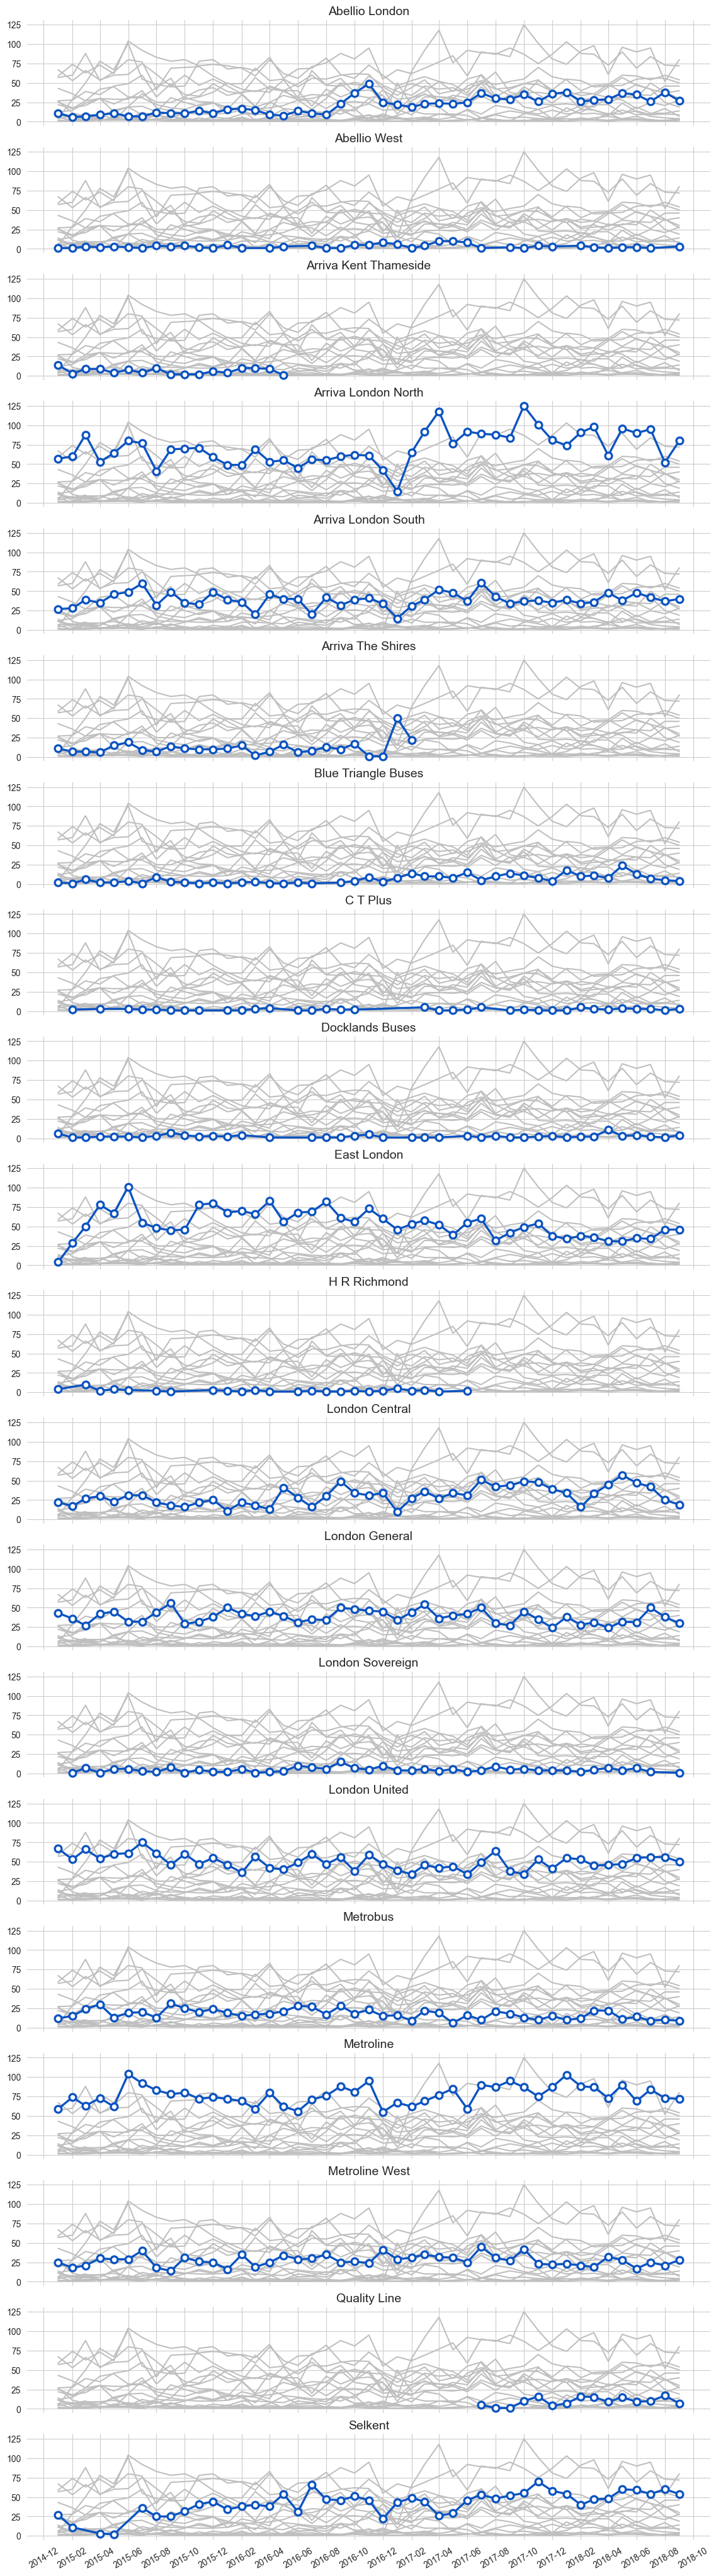

In [22]:
operator_name = p9_v2['Operator'].unique()
operator_1 = operator_name[0]

fig, axes = plt.subplots(20, 1, sharex= True, sharey= True, figsize= (14, 52))
for idx, (ax, country) in enumerate(zip(axes.ravel(), operator_name)):
    annotate = idx == 0
    plot_operator(country, p9_v2, annotate, ax)

**Qual o tipo de incidente mais comum com ciclistas?**

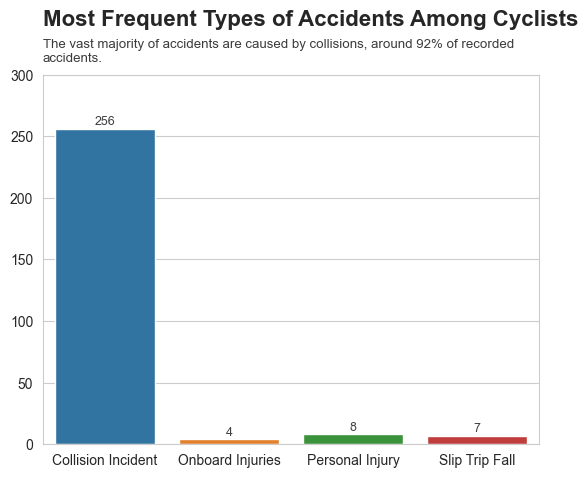

In [23]:
# Filtrando dados
p10 = df[df['Victim Category'] == 'Cyclist']

ax = sns.countplot(x = p10['Incident Event Type'].sort_values())
plt.title('Most Frequent Types of Accidents Among Cyclists', fontsize= 16, y= 1.11, loc= 'left', fontweight= 'bold')

# Removendo a legenda dos eixos x e y
ax.set(xlabel= None, ylabel= None)

# Ajustando o eixo y
ax.set_ylim(0, 300)

# Adicione números nas barras
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha= 'center', va= 'center', fontsize= 9, color= 'black', xytext= (0, 5),
                        alpha= 0.75, textcoords= 'offset points')
    
ax.text(x= -0.5, 
        y= 311,
        s= 'The vast majority of accidents are caused by collisions, around 92% of recorded \naccidents.',
        fontsize= 9.5, 
        alpha= .90);

plt.show()